In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

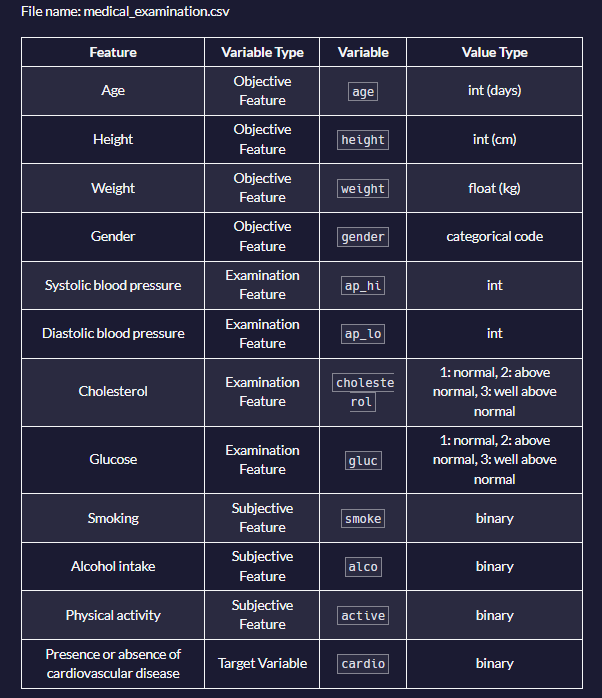

In [2]:
df = pd.read_csv('medical_examination.csv', delimiter =',')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
dftrabajo = df.copy()

In [6]:
BMI = round(dftrabajo['weight'] / ((dftrabajo['height']*(1/100))**2),0)
dftrabajo['BMI'] = BMI

In [7]:
dftrabajo

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,27.0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.0


In [8]:
dftrabajo.shape[0]

70000

In [9]:
vacio = np.zeros(dftrabajo.shape[0])
for i in range(dftrabajo.shape[0]):
    if dftrabajo['BMI'][i] >25:
        vacio[i] =  int(1)
    else:
        vacio[i]= int(0)
    

In [10]:
vacioseries = pd.Series(vacio)
dftrabajo['overweight'] = vacioseries

In [11]:
dftrabajo

vaciocholesterol = np.zeros(dftrabajo.shape[0])
for i in range(dftrabajo.shape[0]):
    if dftrabajo['cholesterol'][i] == 1:
        vaciocholesterol[i] =  int(0)
    else:
        vaciocholesterol[i]= int(1)

In [12]:
vaciogluc = np.zeros(dftrabajo.shape[0])
for i in range(dftrabajo.shape[0]):
    if dftrabajo['gluc'][i] == 1:
        vaciogluc[i] =  int(0)
    else:
        vaciogluc[i]= int(1)

In [13]:
dftrabajo['cholesterol'] = pd.Series(vaciocholesterol)
dftrabajo['gluc'] = pd.Series(vaciogluc)

In [14]:
dftrabajo

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0.0,0.0,0,0,1,0,22.0,0.0
1,1,20228,1,156,85.0,140,90,1.0,0.0,0,0,1,1,35.0,1.0
2,2,18857,1,165,64.0,130,70,1.0,0.0,0,0,0,1,24.0,0.0
3,3,17623,2,169,82.0,150,100,0.0,0.0,0,0,1,1,29.0,1.0
4,4,17474,1,156,56.0,100,60,0.0,0.0,0,0,0,0,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0.0,0.0,1,0,1,0,27.0,1.0
69996,99995,22601,1,158,126.0,140,90,1.0,1.0,0,0,1,1,50.0,1.0
69997,99996,19066,2,183,105.0,180,90,1.0,0.0,0,1,0,1,31.0,1.0
69998,99998,22431,1,163,72.0,135,80,0.0,1.0,0,0,0,1,27.0,1.0


In [15]:
dfcat = pd.DataFrame({'cholesterol': dftrabajo['cholesterol'], 'gluc' :dftrabajo['gluc'], 'smoke' :dftrabajo['smoke'], 'alco':dftrabajo['alco'], 'active' :dftrabajo['active'], 'overweight' :dftrabajo['overweight'], 'cardio' :dftrabajo['cardio']}, columns= ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight', 'cardio' ])

In [16]:
dfcat = pd.DataFrame({'cholesterol': dftrabajo['cholesterol'], 'gluc' :dftrabajo['gluc'], 'smoke' :dftrabajo['smoke'], 'alco':dftrabajo['alco'], 'active' :dftrabajo['active'], 'overweight' :dftrabajo['overweight'], 'cardio' :dftrabajo['cardio']}, columns= ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight', 'cardio' ])
df_cat = pd.melt(dfcat, id_vars= ['cardio'],value_vars= ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0.0
1,1,cholesterol,1.0
2,1,cholesterol,1.0
3,1,cholesterol,0.0
4,0,cholesterol,0.0
...,...,...,...
419995,0,overweight,1.0
419996,1,overweight,1.0
419997,1,overweight,1.0
419998,1,overweight,1.0


In [17]:
dfcatgroup = df_cat.groupby(['cardio','variable', 'value']).value_counts().to_frame()
dfcatgroup 

count
cardio variable    value       
0      active      0.0     6378
                   1.0    28643
       alco        0.0    33080
                   1.0     1941
       cholesterol 0.0    29330
                   1.0     5691
       gluc        0.0    30894
                   1.0     4127
       overweight  0.0    17545
                   1.0    17476
       smoke       0.0    31781
                   1.0     3240
1      active      0.0     7361
                   1.0    27618
       alco        0.0    33156
                   1.0     1823
       cholesterol 0.0    23055
                   1.0    11924
       gluc        0.0    28585
                   1.0     6394
       overweight  0.0    11974
                   1.0    23005
       smoke       0.0    32050
                   1.0     2929

In [18]:
dfcatgroup = dfcatgroup.rename(columns={'count': 'Total'})
dfcatgroup

Total
cardio variable    value       
0      active      0.0     6378
                   1.0    28643
       alco        0.0    33080
                   1.0     1941
       cholesterol 0.0    29330
                   1.0     5691
       gluc        0.0    30894
                   1.0     4127
       overweight  0.0    17545
                   1.0    17476
       smoke       0.0    31781
                   1.0     3240
1      active      0.0     7361
                   1.0    27618
       alco        0.0    33156
                   1.0     1823
       cholesterol 0.0    23055
                   1.0    11924
       gluc        0.0    28585
                   1.0     6394
       overweight  0.0    11974
                   1.0    23005
       smoke       0.0    32050
                   1.0     2929

In [19]:
dfcatgroup = dfcatgroup.reset_index()
dfcatgroup

,cardio,variable,value,Total
0,0,active,0.0,6378
1,0,active,1.0,28643
2,0,alco,0.0,33080
3,0,alco,1.0,1941
4,0,cholesterol,0.0,29330
5,0,cholesterol,1.0,5691
6,0,gluc,0.0,30894
7,0,gluc,1.0,4127
8,0,overweight,0.0,17545
9,0,overweight,1.0,17476


In [20]:
dfcatgroup['value'] = dfcatgroup['value'].astype(str)

In [21]:
dfcatgroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cardio    24 non-null     int64 
 1   variable  24 non-null     object
 2   value     24 non-null     object
 3   Total     24 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 900.0+ bytes


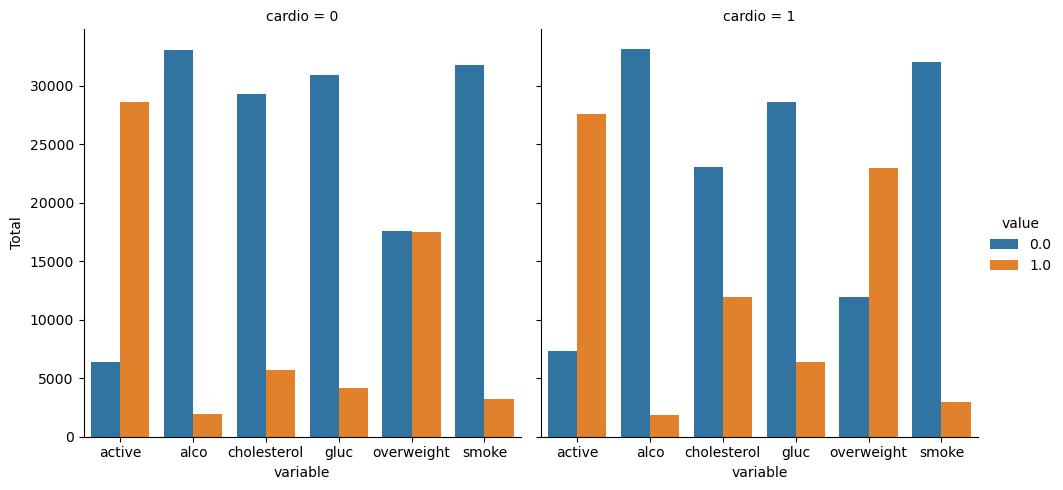

In [22]:
sns.catplot(dfcatgroup, x='variable', y='Total', hue='value', kind='bar', col= 'cardio')

### Limpieza de datos

In [23]:
# la presión diastólica es superior a la sistólica
df_heat = dftrabajo[(dftrabajo['ap_lo'] <= dftrabajo['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (dftrabajo['height']<= dftrabajo['height'].quantile(0.975)) & (dftrabajo['weight']>= dftrabajo['weight'].quantile(0.025)) & (dftrabajo['weight']<= dftrabajo['weight'].quantile(0.975))]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0.0,0.0,0,0,1,0,22.0,0.0
1,1,20228,1,156,85.0,140,90,1.0,0.0,0,0,1,1,35.0,1.0
2,2,18857,1,165,64.0,130,70,1.0,0.0,0,0,0,1,24.0,0.0
3,3,17623,2,169,82.0,150,100,0.0,0.0,0,0,1,1,29.0,1.0
4,4,17474,1,156,56.0,100,60,0.0,0.0,0,0,0,0,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0.0,0.0,0,0,1,1,24.0,0.0
69994,99992,21074,1,165,80.0,150,80,0.0,0.0,0,0,1,1,29.0,1.0
69995,99993,19240,2,168,76.0,120,80,0.0,0.0,1,0,1,0,27.0,1.0
69998,99998,22431,1,163,72.0,135,80,0.0,1.0,0,0,0,1,27.0,1.0


In [24]:
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,0.000029,-0.001762
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.110417,0.093908
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.135590,-0.060552
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.265556,-0.158893
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.860927,0.677277
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.024969,0.016385
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.215971,0.177592
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.166703,0.134916
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.121609,0.094471
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.041682,-0.008765


In [25]:
# creating mask 
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

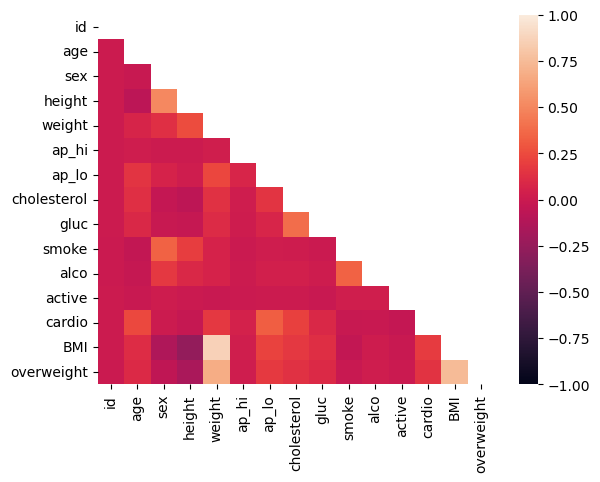

In [26]:
sns.heatmap(corr, mask= mask, vmin = -1 , vmax = 1)
plt.show()